# Task 1

In [ ]:
import pandas as pd

path = 'S_Data/'
endpoint = '.csv'

csvs = ['customers', 
        'geolocation', 
        'order_items', 
        'order_payments', 
        'order_reviews', 
        'orders', 
        'product_category_name_translation',
        'products',
        'sellers']
dfs = {}

for name in csvs:
    print(name.upper(),'\n\n')
    dfs[name] = pd.read_csv(path+name+endpoint)
    

#### To do

##### (done) english name, 
##### (done) average delivery time, 
##### (done) average delivery time from last 14 days,
##### (done) average product price,
##### (done) actual product price,
##### (done) sales from last 14 days, 
##### (done) total sale per seller from 14 days, 
##### reviews since products sale started, 
##### number of reviews added in 14 days, 
##### average fracht_val in past 14 days
##### get reviews in function same as other values in other df then merge dfs

### Code

#### 1. English name

In [2]:
dfs['products'].head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

In [3]:
dfs['product_category_name_translation'].head()

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

In [4]:
## get english category name

dfs['products'] = dfs['products'].merge(dfs['product_category_name_translation'],
                                        how = 'inner',
                                        on = 'product_category_name')

#### 2. Add missing delivery dates, get necessary date for subset

In [5]:
dfs['orders'].head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [6]:
dfs['orders']['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [7]:
## get only valid orders
dfs['orders'] = dfs['orders'].loc[(dfs['orders']['order_status'] != 'canceled') & 
                                  (dfs['orders']['order_status'] != 'unavailable')]

In [8]:
print(dfs['orders'].isna().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  19
order_delivered_carrier_date      624
order_delivered_customer_date    1737
order_estimated_delivery_date       0
dtype: int64


In [9]:
print(dfs['orders'].dtypes,
      '\n', 
      dfs['order_reviews'].dtypes)

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object 
 review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object


In [10]:
## merge dataframes for product id, price, number of ordered items, reviews
dfs['orders'] = dfs['order_items'].merge(dfs['orders'], on = 'order_id', how = 'right')
dfs['orders'] = dfs['orders'].merge(dfs['order_reviews'], on='order_id', how ='left')
dfs['orders'] = dfs['orders'].merge(dfs['products'], on = 'product_id', how = 'left')

In [11]:
dfs['orders']['order_purchase_timestamp'] = pd.to_datetime(dfs['orders']['order_purchase_timestamp'])
dfs['orders']['order_delivered_customer_date'] = pd.to_datetime(dfs['orders']['order_delivered_customer_date'])
dfs['orders']['review_creation_date'] = pd.to_datetime(dfs['orders']['review_creation_date'])

## fill nan values after grouping by product id so values are more reliable
dfs['orders'].sort_values(by='product_id', inplace=True)
dfs['orders']['order_delivered_customer_date'].ffill(inplace=True)

/var/folders/bz/m_9l75x14kz_37vfj8r34b2r0000gn/T/ipykernel_17079/1906626660.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfs['orders']['order_delivered_customer_date'].ffill(inplace=True)


In [12]:
## get order date, review date, delivery date and delivery time

dfs['orders']['purchase_year'] = dfs['orders']['order_purchase_timestamp'].dt.year
dfs['orders']['purchase_day'] = dfs['orders']['order_purchase_timestamp'].dt.dayofyear

dfs['orders']['review_year'] = dfs['orders']['review_creation_date'].dt.year
dfs['orders']['review_day'] = dfs['orders']['review_creation_date'].dt.dayofyear


dfs['orders']['delivery_year'] = dfs['orders']['order_delivered_customer_date'].dt.year
dfs['orders']['delivery_day'] = dfs['orders']['order_delivered_customer_date'].dt.dayofyear

## calculate delivery time (check if delivery and purchase were made in same year)
dfs['orders']['delivery_time'] = ((dfs['orders']['delivery_year'] - dfs['orders']['purchase_year'])*365 + 
                                 dfs['orders']['delivery_day'] - dfs['orders']['delivery_day'])

## if delivery and purchase years were different check if purchase year was leap
for index, row in dfs['orders'].iterrows():
    if row['purchase_year'] != row['delivery_year']:
        if row['purchase_year']%4 ==0 and row['purchase_year']%100 == 0 and row['purchase_year']%400 == 0:
            dfs['orders'].at[index, 'delivery_time'] += 1

#### 3.

In [13]:
## get data from 14 days
def is_leap(year):
    if year%4 == 0 and year%100 == 0 and year%400 == 0:
        return True
    else:
        return False

In [14]:
## get end of subset (check if it ends in following year)
def get_end(year, day_s, sub_size):
    
    if is_leap(year):
        if day_s > 366 - sub_size:
            day_e = 366 - day_s
            year_e = year + 1
        else:
            day_e = day_s + sub_size
            year_e = year
    else:
        if day_s > 365 - sub_size:
            day_e = 365 - day_s
            year_e = year + 1
        else:
            day_e = day_s + sub_size
            year_e = year
    return day_s, year

In [ ]:
def get_historical_data(dfs, day_end, year_end, column_gb):
    
    ## income from product per order
    dfs['orders']['incomes'] = dfs['orders']['order_item_id']*dfs['orders']['price']

    ## orders till end date
    orders_bef = dfs['orders'].loc[(dfs['orders']['purchase_year'] < year_end) |
                                   ((dfs['orders']['purchase_year'] == year_end) &
                                    (dfs['orders']['purchase_day'] < day_end))]
    ## df with orders before end day
    df_bef = orders_bef.groupby(column_gb).agg({'delivery_time': 'mean', 
                                                'price': 'mean', 
                                                'order_item_id': 'sum', 
                                                'incomes': 'sum',
                                                'freight_value': 'mean'}).reset_index()    
    ## df with orders per seller before end day 
    df_bef_per_seller = orders_bef.groupby([column_gb, 'seller_id']).agg({'delivery_time': 'mean', 
                                                                          'price': 'mean', 
                                                                          'order_item_id': 'sum',
                                                                          'incomes': 'sum',
                                                                          'freight_value': 'mean'}).reset_index()
    ## reviews since sale began
    review_bef = dfs['orders'].loc[(dfs['orders']['review_year'] < year_end) |
                                   ((dfs['orders']['review_year'] == year_end) &
                                    (dfs['orders']['review_day'] < day_end))]
    
    ## df with mean reviews score for each product category since it sales began
    df_bef_reviews = review_bef.groupby(column_gb)['review_score'].mean().reset_index()

    ## merging dataframes to get proper information about product
    df_before_start_day = df_bef.merge(df_bef_reviews, on = column_gb, how = 'left')
    df_before_start_day.rename(columns={'delivery_time': 'avg_delivery_time', 
                                        'price': 'avg_price',
                                        'order_item_id' : 'number_of_sold_items',
                                        'freight_value': 'avg_freight_val',
                                        'review_score': 'avg_review_score'},
                               inplace = True)
    
    ## merging dataframes with collected informations for each seller
    df_before_start_day_per_seller = df_bef_per_seller.merge(df_bef_reviews, on = column_gb, how = 'left')
    df_before_start_day_per_seller.rename(columns={'delivery_time': 'avg_delivery_time', 
                                        'price': 'avg_price',
                                        'order_item_id' : 'number_of_sold_items',
                                        'freight_value': 'avg_freight_val',
                                        'review_score': 'avg_review_score'},
                               inplace = True)

## at the end we have 2 dataframes: 
## 1st with product information since it sales began to start day
## 2nd with product information same as in 1st one but for each seller
    return(df_before_start_day, df_before_start_day_per_seller)

In [21]:
def get_subset_data(dfs, year, day_s, sub_size, column_gb):
    
    ##calculate end of subset
    day_e, year_e = get_end(year, day_s, sub_size)

    ## income from product per order
    dfs['orders']['incomes'] = dfs['orders']['order_item_id']*dfs['orders']['price']
    
    ## orders from start date to end date
    if year == year_e:
        orders_act = dfs['orders'].loc[(dfs['orders']['purchase_year'] == year) & 
                                       (dfs['orders']['purchase_day'] >= day_s) & 
                                       (dfs['orders']['purchase_day'] <= day_e)]
    else:
        orders_act = dfs['orders'].loc[((dfs['orders']['purchase_year'] == year) & 
                                        (dfs['orders']['purchase_day'] >= day_s)) |
                                       ((dfs['orders']['purchase_year'] == year_e) & 
                                        (dfs['orders']['purchase_day'] <= day_e))]
                                        
## each dataframe consists 
##    mean values: delivery time, price and freight value
##    sum values: incomes and number of ordered items

    ## df with orders from start date to end date
    df_act = orders_act.groupby(column_gb).agg({'delivery_time': 'mean', 
                                                   'price': 'mean', 
                                                   'order_item_id': 'sum', 
                                                   'incomes': 'sum',
                                                   'freight_value': 'mean'}).reset_index()
                                
## same information collected for each seller

    ## df with orders from start date to end date
    df_act_per_seller = orders_act.groupby([column_gb, 'seller_id']).agg({'delivery_time': 'mean', 
                                                                             'price': 'mean', 
                                                                             'order_item_id': 'sum',
                                                                             'incomes': 'sum',
                                                                             'freight_value': 'mean'}).reset_index()

    ## reviews added between start and end date 
    if year == year_e:
        review_act = dfs['orders'].loc[(dfs['orders']['review_year'] == year) & 
                                       (dfs['orders']['review_day'] >= day_s) & 
                                       (dfs['orders']['review_day'] <= day_e)]
    else:
        review_act = dfs['orders'].loc[((dfs['orders']['review_year'] == year) & 
                                        (dfs['orders']['review_day'] >= day_s)) |
                                       ((dfs['orders']['review_year'] == year_e) & 
                                        (dfs['orders']['review_day'] <= day_e))]

    ## df with mean reviews score value in time period from start to end date for each product 
    df_act_reviews = review_act.groupby(column_gb)['review_score'].mean().reset_index()

## merging dataframes to get proper information about product
    df_actual = df_act.merge(df_act_reviews, on = column_gb, how = 'left')
    df_actual.rename(columns={'delivery_time': 'avg_delivery_time', 
                              'price': 'avg_price',
                              'order_item_id' : 'number_of_sold_items',
                              'freight_value': 'avg_freight_val',
                              'review_score': 'avg_review_score'},
                     inplace = True)                     

## merging dataframes with collected informations for each seller
    df_actual_per_seller = df_act_per_seller.merge(df_act_reviews, on = column_gb, how = 'left')
    df_actual_per_seller.rename(columns={'delivery_time': 'avg_delivery_time', 
                                        'price': 'avg_price',
                                        'order_item_id' : 'number_of_sold_items',
                                        'freight_value': 'avg_freight_val',
                                        'review_score': 'avg_review_score'},
                               inplace = True)

## at the end we have 2 dataframes: 
## 1st with product information from start date to end date
## 2nd with product information same as in 1st one but for each seller
    return(df_actual, df_actual_per_seller)

In [ ]:
## calculate period of time for historical data
def period(day, year, year_start, day_start):

    if day < 1 or day > 366 or day_start < 1 or day_start > 366:
        raise ValueError("Day values must be between 1 and 366.")
    if year < year_start:
        raise ValueError("End year must be greater than or equal to start year.")
    
    if year == year_start:
        return day - day_start
    elif year - year_start == 1:
        if is_leap(year_start):
            return day + 366 - day_start
        else:
            return day + 365 - day_start
    else:
        if is_leap(year_start):
            days = 366 - day_start
        else:
            days = 365 - day_start
        for i in range(year-year_start-1):
            if is_leap(year_start+i+1):
                days+=366
            else:
                days+=365
        return days

In [ ]:
def add_dates_subset(df, day_s, year_s, sub_size):
    day_e, year_e = get_end(year_s, day_s, sub_size)
    df['start_day'] = day_s
    df['start_year'] = year_s
    df['time_period'] = sub_size
    df['end_day'] = day_e
    df['end_year'] = year_e
    return df

In [ ]:
def add_dates_historical(df, day_start, year_start, day_end, year_end):
    df['start_day'] = day_start
    df['start_year'] = year_start
    df['time_period'] = period(day_end, year_end)
    df['end_day'] = day_end
    df['end_year'] = year_end
    return df

Empty DataFrame
Columns: [product_category, avg_delivery_time, avg_price, number_of_sold_items, incomes, avg_freight_val, avg_review_score]
Index: []


(                  product_category  avg_delivery_time   avg_price  \
 0                 air_conditioning         146.000000  170.709000   
 1                            audio           0.000000   78.495000   
 2                             auto          81.111111  156.472222   
 3                             baby           0.000000  124.651818   
 4                   bed_bath_table           0.000000   59.873750   
 5           books_general_interest         365.000000  119.500000   
 6                  books_technical         365.000000  267.000000   
 7            computers_accessories         191.190476   66.634286   
 8                   consoles_games          73.000000  388.226000   
 9                       cool_stuff           0.000000  149.442857   
 10             diapers_and_hygiene           0.000000  134.900000   
 11                     electronics           0.000000  107.990000   
 12          fashio_female_clothing           0.000000   54.900000   
 13        fashion_b

In [17]:
year_start = dfs['orders'].sort_values(by='purchase_year')['purchase_year'].values[0]
day_start =  dfs['orders'].sort_values(by=['purchase_year', 'purchase_day'])['purchase_day'].values[0]

year_end =  dfs['orders'].sort_values(by='purchase_year', ascending = False)['purchase_year'].values[0]
day_end =  dfs['orders'].sort_values(by=['purchase_year', 'purchase_day'], 
                                     ascending = [False, False])['purchase_day'].values[0]
if day_end >= 7:
    day_end -= 7
else:
    year_end -= 1
    day_end = 365 + day_end - 7
    if is_leap(year_end):
        day_end += 1
    else:
        pass

offset = 0 # after how many subset collected  you want to start collecting historical data (from start day there wont be much data)
subset_size = 14
loop = 0
start = True
is_product_new = False


if is_product_new:
    column_groupby = 'product_id'
else:
    column_groupby = 'product_category_name_english'

data = pd.DataFrame()
data_per_seller = pd.DataFrame()

## go through all years and days, start parameter let start from proper day
for year in range(year_start, year_end +1):
    for day in range(0, 365):
        loop += 1
        if start:
            day = day_start
            start = False
            pass
        else:
            if (day >= day_end)&(year>=year_end):
                break
            else:
                actual, actual_per_seller = get_subset_data(dfs, year, day, subset_size, column_groupby)
                actual = add_dates_subset(actual, day_start, year_start, subset_size)
                actual_per_seller = add_dates_subset(actual_per_seller, day_start, year_start, subset_size)
                if loop == 1:
                    data = actual
                    data_per_seller = actual_per_seller
                else:
                    data = pd.concat([data, actual], ignore_index=True)
                    data_per_seller = pd.concat([data_per_seller, actual_per_seller], ignore_index=True)
                day = day + subset_size
                
historical, historical_per_seller =  get_historical_data(dfs, day_end, year_end, column_groupby)
historical = add_dates_historical(historical, day_start, year_start, day_end, year_end)
historical_per_seller = add_dates_historical(historical_per_seller, day_start, year_start, day_end, year_end)
data = pd.concat([data, historical], ignore_index=True)
data_per_seller = pd.concat([data_per_seller, historical_per_seller], ignore_index=True)

end


### TIME FOR TRAIN AND TEST 
### ALSO CHECK IF NEW PRODUCT IF YES FIND SIMILIAR

# Task 2 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = 'S_Data/'
endpoint = '.csv'

csvs = ['customers', 
        'geolocation', 
        'order_items', 
        'order_payments', 
        'order_reviews', 
        'orders', 
        'product_category_name_translation',
        'products',
        'sellers']
dfs = {}

for name in csvs:
    print(name.upper())
    dfs[name] = pd.read_csv(path+name+endpoint)

dfs['orders']['order_purchase_timestamp'] = pd.to_datetime(dfs['orders']['order_purchase_timestamp'])
# get english category name
dfs['products'] = dfs['products'].merge(dfs['product_category_name_translation'],
                                        how = 'inner',
                                        on = 'product_category_name')

CUSTOMERS
GEOLOCATION
ORDER_ITEMS
ORDER_PAYMENTS
ORDER_REVIEWS
ORDERS
PRODUCT_CATEGORY_NAME_TRANSLATION
PRODUCTS
SELLERS


In [8]:
## function filters data by date if necessary
def get_turnover(df, start_day, start_month, start_year, end_day, end_month, end_year):
    
    start_date = pd.Timestamp(year=start_year, month=start_month, day=start_day)
    end_date = pd.Timestamp(year=end_year, month=end_month, day=end_day)
    
    df_filtered = df[df['order_purchase_timestamp'].between(start_date, end_date)]
    
    return df

In [26]:
sales_areas = dfs['orders'].merge(dfs['order_items'], on = 'order_id', how = 'left')
sales_areas = sales_areas.merge(dfs['products'], on = 'product_id', how = 'left')

#### 1. the sellers with the biggest/smallest turnover

##### Code

In [41]:
# parameters

# select how many top sellers you want to see
top = 10

## select time period for turnover per seller
## if year parameters are 0 whole data frame will be used
start_day = 1
start_month = 1
start_year = 0
end_day = 1
end_month = 1
end_year = 0

In [44]:
turnover = dfs['orders'].merge(dfs['order_items'], on = 'order_id', how = 'left')

# get amount for each order
turnover['total_amount'] = turnover['order_item_id']*turnover['price'] + turnover['order_item_id']*turnover['freight_value']

if start_year !=0 and end_year !=0:
    turnover_df = get_turnover(turnover, start_day, start_month, start_year, end_day, end_month, end_year)
else:
    turnover_df = turnover

# get total incomes per seller
turnover_per_seller = turnover_df.groupby('seller_id')['total_amount'].sum().reset_index().sort_values(by='total_amount', ascending = False)
turnover_per_seller = turnover_per_seller.merge(dfs['sellers'], on = 'seller_id', how = 'left')  

if top < turnover_per_seller.size:
    print(f'top {top} sellers with biggest turnover: \n', turnover_per_seller.head(top), '\n')
    print(f'top {top} sellers with smallest turnover: \n', turnover_per_seller.tail(top))
else:
    print('sellers turnover: \n', turnover_per_seller)

top 10 sellers with biggest turnover: 
                           seller_id  total_amount  seller_zip_code_prefix  \
0  7c67e1448b00f6e969d365cea6b010ab     375389.31                    8577   
1  4a3ca9315b744ce9f8e9374361493884     266660.94                   14940   
2  53243585a1d6dc2643021fd1853d8905     260379.81                   42738   
3  4869f7a5dfa277a7dca6462dcf3b52b2     256418.18                   14840   
4  1025f0e2d44d7041d6cf58b6550e0bfa     240516.24                    3204   
5  da8622b14eb17ae2831f4ac5b9dab84a     228418.57                   13405   
6  1f50f920176fa81dab994f9023523100     214499.35                   15025   
7  fa1c13f2614d7b5c4749cbc52fecda94     205775.24                   13170   
8  955fee9216a65b617aa5c0531780ce60     198078.49                    4782   
9  7e93a43ef30c4f03f38b393420bc753a     184320.77                    6429   

             seller_city seller_state  
0        itaquaquecetuba           SP  
1               ibitinga        

##### Plots

C:\Users\olows\AppData\Local\Temp\ipykernel_12952\4089717835.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


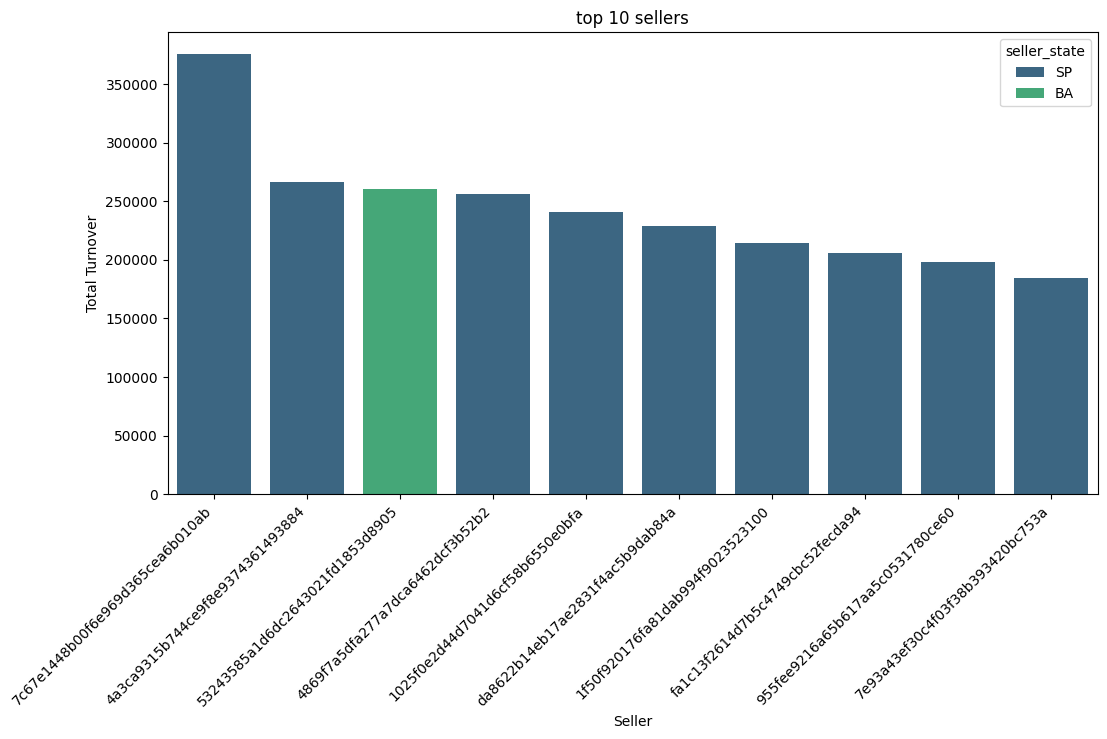

In [49]:
# Leaders
leaders_plt = turnover_per_seller.head(top)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='seller_id', y='total_amount', data=leaders_plt, palette='viridis', hue='seller_state')
plt.title(f'top {top} sellers')
plt.xlabel('Seller')
plt.ylabel('Total Turnover')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

C:\Users\olows\AppData\Local\Temp\ipykernel_12952\4245486627.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


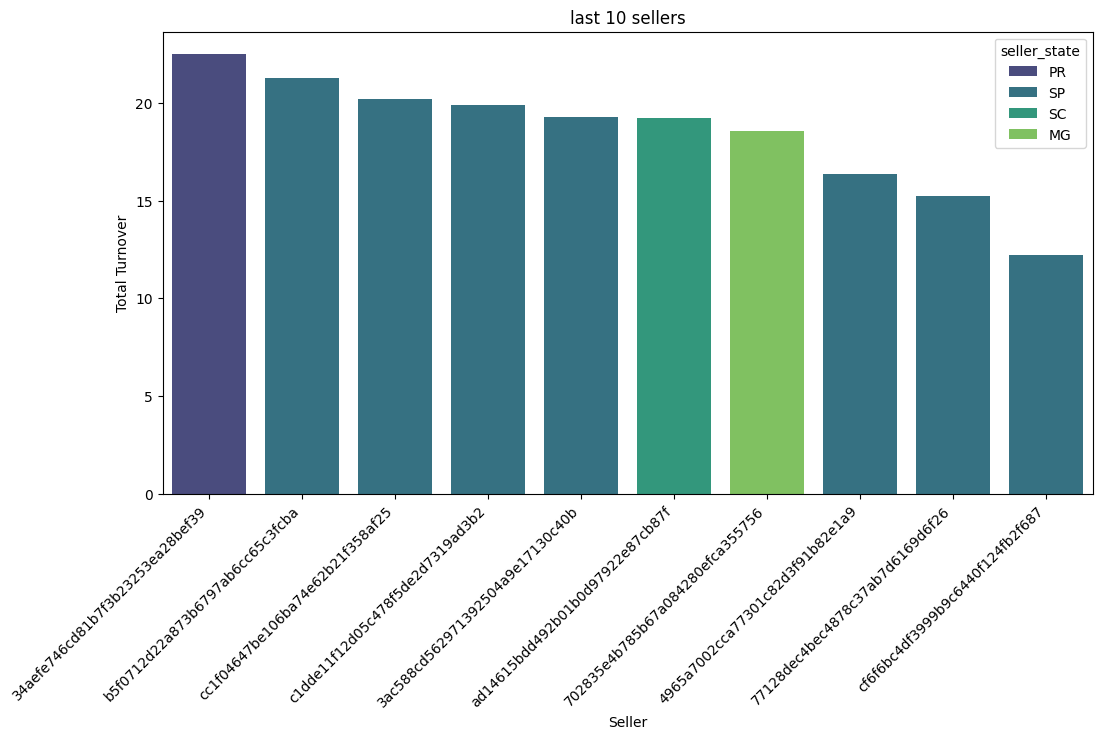

In [50]:
# Losers
leaders_plt = turnover_per_seller.tail(top)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='seller_id', y='total_amount', data=leaders_plt, palette='viridis', hue='seller_state')
plt.title(f'last {top} sellers')
plt.xlabel('Seller')
plt.ylabel('Total Turnover')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

#### 2. leaders/outsiders in sales in each area 

##### Code

In [51]:
# parameters

# select how many top sellers you want to see
top = 3

## select time period for turnover per seller
## if year parameters are 0 whole data frame will be used
start_day = 1
start_month = 1
start_year = 0
end_day = 1
end_month = 1
end_year = 0

# select categories you want to see leaders and outsiders in
# you can select one category as string or many as list
# if other type will be provided you will see leaders and outsiders for all categories
category = ['art', 'auto']

In [53]:
if start_year !=0 and end_year !=0:
    sales_areas_df = get_turnover(sales_areas, start_day, start_month, start_year, end_day, end_month, end_year)
else:
    sales_areas_df = sales_areas

In [54]:
all_categories = sales_areas_df['product_category_name_english'].unique()
all_categories = all_categories.astype(str)
all_categories = np.sort(all_categories)
for el in all_categories:
    print(el)

agro_industry_and_commerce
air_conditioning
art
arts_and_craftmanship
audio
auto
baby
bed_bath_table
books_general_interest
books_imported
books_technical
cds_dvds_musicals
christmas_supplies
cine_photo
computers
computers_accessories
consoles_games
construction_tools_construction
construction_tools_lights
construction_tools_safety
cool_stuff
costruction_tools_garden
costruction_tools_tools
diapers_and_hygiene
drinks
dvds_blu_ray
electronics
fashio_female_clothing
fashion_bags_accessories
fashion_childrens_clothes
fashion_male_clothing
fashion_shoes
fashion_sport
fashion_underwear_beach
fixed_telephony
flowers
food
food_drink
furniture_bedroom
furniture_decor
furniture_living_room
furniture_mattress_and_upholstery
garden_tools
health_beauty
home_appliances
home_appliances_2
home_comfort_2
home_confort
home_construction
housewares
industry_commerce_and_business
kitchen_dining_laundry_garden_furniture
la_cuisine
luggage_accessories
market_place
music
musical_instruments
nan
office_furnit

In [55]:
def print_data(data, category_name, top):
    if top < data.size:
        print(f'top {top} leaders with biggest turnover in category {category_name}: \n', data.head(top), '\n')
        print(f'top {top} outsiders with smallest turnover in category {category_name}: \n', data.tail(top))
        # possible to print every seller that sold the same amount of item if number of such sellers is bigger than top parameter
    else:
        print(f'sellers turnover in category {category_name}: \n', data)

In [58]:
# get amount for each order
sales_areas_df['total_amount'] = sales_areas_df['order_item_id']*sales_areas_df['price'] + sales_areas_df['order_item_id']*sales_areas_df['freight_value']

turnover_per_category_seller = sales_areas_df.groupby(['product_category_name_english', 'seller_id'])['total_amount'].sum().reset_index()
turnover_per_category_seller = turnover_per_category_seller.merge(dfs['sellers'], on = 'seller_id', how = 'left')  

if isinstance(category, list):
    for el in category:
        category_data = turnover_per_category_seller.loc[turnover_per_category_seller['product_category_name_english'] == el].sort_values(by='total_amount', ascending= False)
        print_data(category_data, el, top)
        print('\n')
elif isinstance(category, str):
    category_data = turnover_per_category_seller.loc[turnover_per_category_seller['product_category_name_english'] == category].sort_values(by='total_amount', ascending= False)
    print_data(category_data, category, top)

else:
    for el in all_categories:
        category_data = turnover_per_category_seller.loc[turnover_per_category_seller['product_category_name_english'] == el].sort_values(by='total_amount', ascending= False)
        print_data(category_data, el, top)
        print('\n')

top 3 leaders with biggest turnover in category art: 
     product_category_name_english                         seller_id  \
116                           art  c31eff8334d6b3047ed34bebd4d62c36   
120                           art  ee27a8f15b1dded4d213a468ba4eb391   
109                           art  a0e19590a0923cdd0614ea9427713ced   

     total_amount  seller_zip_code_prefix           seller_city seller_state  
116      13389.07                   13322                 salto           SP  
120       6726.66                   74210               goiania           GO  
109       1263.52                   83075  sao jose dos pinhais           PR   

top 3 outsiders with smallest turnover in category art: 
     product_category_name_english                         seller_id  \
100                           art  6614814a00d344b846ae209f95ee7e3f   
121                           art  f593898ec748b7a8cb81fc04edafd98a   
117                           art  cf6f6bc4df3999b9c6440f124fb2f687   


##### Plots

C:\Users\olows\AppData\Local\Temp\ipykernel_12952\298100872.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='product_category_name_english', y='total_amount', data=best_sellers, palette='viridis')
C:\Users\olows\AppData\Local\Temp\ipykernel_12952\298100872.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


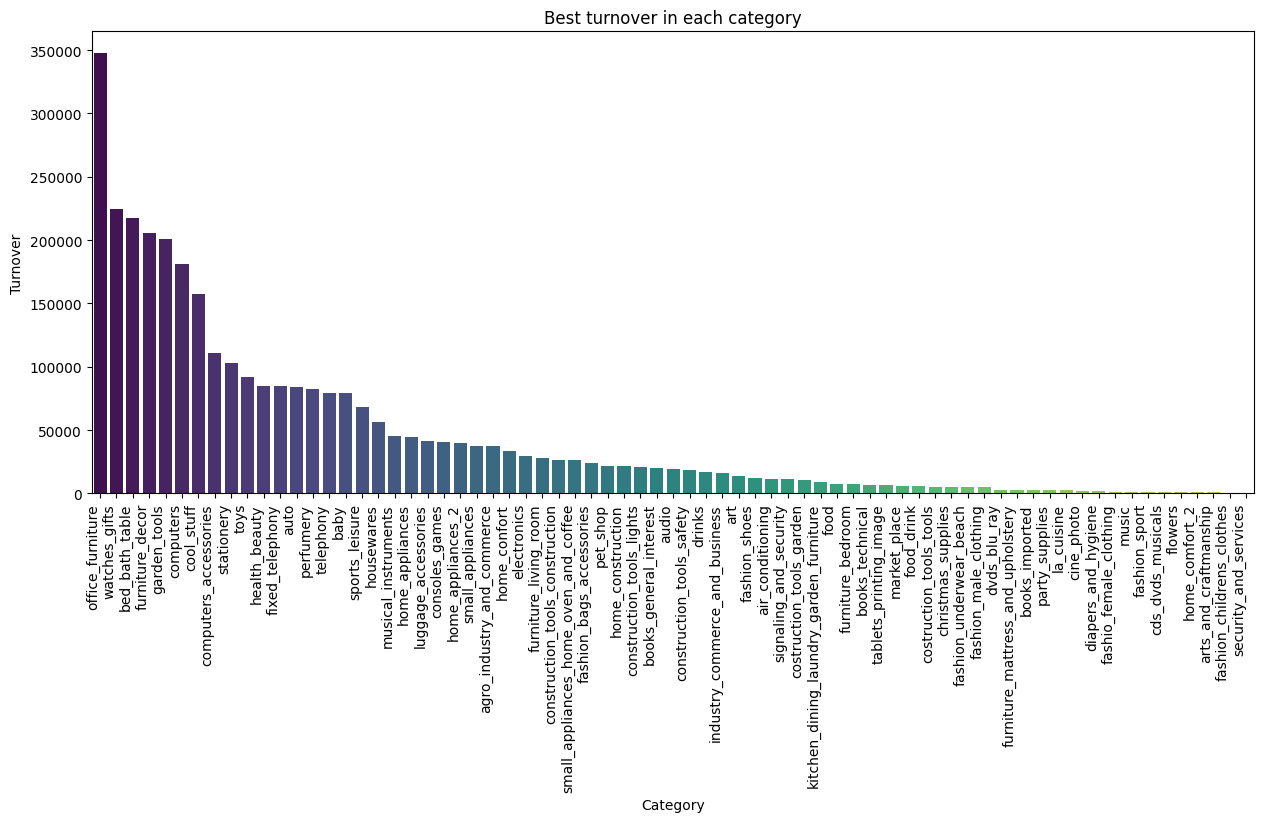

In [64]:
# highest turnover in each category
total_turnover_per_cat = sales_areas_df.groupby(['product_category_name_english', 'seller_id'])['total_amount'].sum().reset_index()
best_per_cat = total_turnover_per_cat.groupby('product_category_name_english')['total_amount'].max().reset_index().sort_values(by= 'total_amount', ascending = False)

best_sellers = pd.merge(best_per_cat, total_turnover_per_cat, on=['product_category_name_english', 'total_amount'])
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='product_category_name_english', y='total_amount', data=best_sellers, palette='viridis')
plt.title('Best turnover in each category')
plt.xlabel('Category')
plt.ylabel('Turnover')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.show()

#### 3. which products sell best in each category

##### Code

In [28]:
all_categories = sales_areas['product_category_name_english'].unique()
all_categories = all_categories.astype(str)
all_categories = np.sort(all_categories)
for el in all_categories:
    print(el)

agro_industry_and_commerce
air_conditioning
art
arts_and_craftmanship
audio
auto
baby
bed_bath_table
books_general_interest
books_imported
books_technical
cds_dvds_musicals
christmas_supplies
cine_photo
computers
computers_accessories
consoles_games
construction_tools_construction
construction_tools_lights
construction_tools_safety
cool_stuff
costruction_tools_garden
costruction_tools_tools
diapers_and_hygiene
drinks
dvds_blu_ray
electronics
fashio_female_clothing
fashion_bags_accessories
fashion_childrens_clothes
fashion_male_clothing
fashion_shoes
fashion_sport
fashion_underwear_beach
fixed_telephony
flowers
food
food_drink
furniture_bedroom
furniture_decor
furniture_living_room
furniture_mattress_and_upholstery
garden_tools
health_beauty
home_appliances
home_appliances_2
home_comfort_2
home_confort
home_construction
housewares
industry_commerce_and_business
kitchen_dining_laundry_garden_furniture
la_cuisine
luggage_accessories
market_place
music
musical_instruments
nan
office_furnit

In [29]:
# parameters

## select time period for products sale
## if year parameters are 0 whole data frame will be used
start_day = 1
start_month = 1
start_year = 0
end_day = 1
end_month = 1
end_year = 0

# select categories you want to see best products in
# you can select one category as a string or many as a list
# if other type will be provided you will see leaders and outsiders for all categories
category = None

In [30]:
def print_data(data, category):
    if len(data) > 0:
        sold = round(data.sort_values(by='sold_items', ascending=False)['sold_items'].values[0], 0)
        data = data.loc[data['sold_items'] == sold]
        
        if len(data) > 1:
            print(f'best-selling products in category {category} (sold {sold}): \n', data['product_id'].values)
            # possible to print every seller that sold the same amount of item if number of such sellers is bigger than top parameter
        else:
            print(f'best-selling product in category {category} (sold {sold}): \n', data['product_id'].values)
    else:
        print(f'no product sold in category {category}')

In [31]:
data = dfs['orders'].merge(dfs['order_items'], on = 'order_id', how = 'left')
data = data.merge(dfs['products'], on = 'product_id', how = 'left')

if start_year !=0 and end_year !=0:
    products_df = get_turnover(data, start_day, start_month, start_year, end_day, end_month, end_year)
else:
    products_df = data

best_products = products_df.groupby('product_id')['order_item_id'].sum().reset_index()
best_products.rename(columns={'order_item_id': 'sold_items'}, inplace=True)
best_products = best_products.merge(dfs['products'], on = 'product_id', how = 'left')

if isinstance(category, list):
    for el in category:
        prod_data = best_products.loc[best_products['product_category_name_english'] == el]
        print_data(prod_data, el)
elif isinstance(category, str):
        prod_data = best_products.loc[best_products['product_category_name_english'] == category]
        print_data(prod_data, category)
else:
    for el in all_categories:
        prod_data = best_products.loc[best_products['product_category_name_english'] == el]
        print_data(prod_data, el)

best-selling product in category agro_industry_and_commerce (sold 23.0): 
 ['11250b0d4b709fee92441c5f34122aed']
best-selling product in category air_conditioning (sold 30.0): 
 ['f2a1b32f85cad59ff2a8444154ac25f0']
best-selling product in category art (sold 111.0): 
 ['4fe644d766c7566dbc46fb851363cb3b']
best-selling product in category arts_and_craftmanship (sold 5.0): 
 ['b9976e9c22fb1540bd71d1bcd2989475']
best-selling product in category audio (sold 49.0): 
 ['db5efde3ad0cc579b130d71c4b2db522']
best-selling product in category auto (sold 210.0): 
 ['9571759451b1d780ee7c15012ea109d4']
best-selling product in category baby (sold 95.0): 
 ['cac9e5692471a0700418aa3400b9b2b1']
best-selling product in category bed_bath_table (sold 542.0): 
 ['99a4788cb24856965c36a24e339b6058']
best-selling product in category books_general_interest (sold 61.0): 
 ['f35927953ed82e19d06ad3aac2f06353']
best-selling product in category books_imported (sold 9.0): 
 ['68ad45d48d69404aeb71ce87e1b2c948']
best-selli

##### Plots

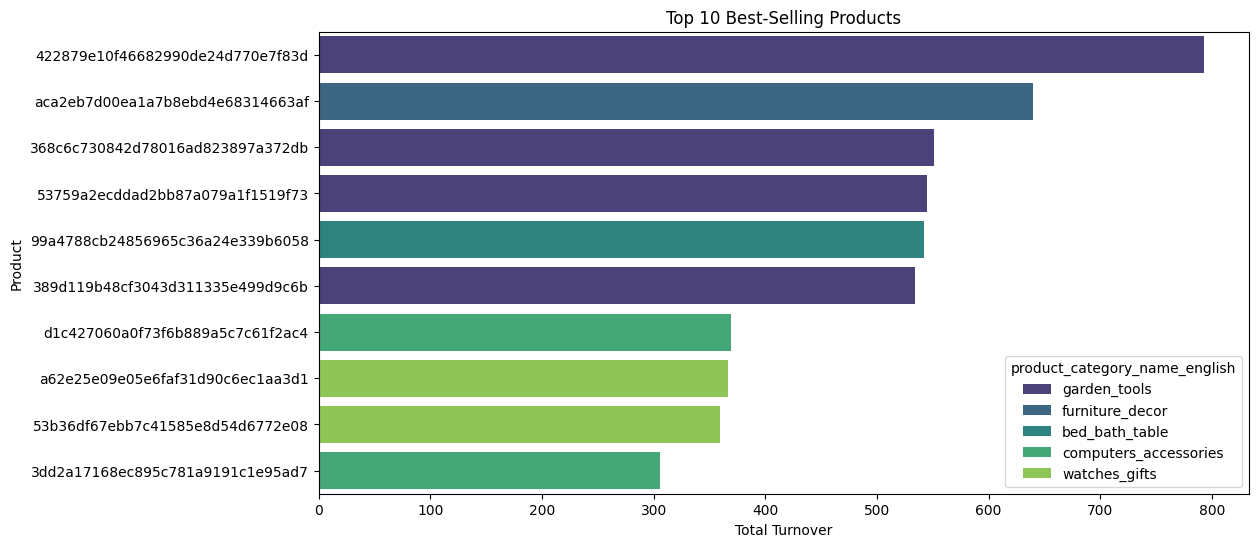

In [38]:
b_prod_plt = best_products.sort_values(by='sold_items', ascending = False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='sold_items', y='product_id', data=b_prod_plt, palette='viridis', hue='product_category_name_english')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Turnover')
plt.ylabel('Product')
plt.show()

#### 4. the dependence of product weight on turnover and price.

##### Code

In [9]:
# parameters

## select time period for products sale
## if year parameters are 0 whole data frame will be used
start_day = 1
start_month = 1
start_year = 0
end_day = 1
end_month = 1
end_year = 0

In [12]:
task_4 = dfs['orders'].merge(dfs['order_items'], on = 'order_id', how = 'inner')

if start_year !=0 and end_year !=0:
    task_4 = get_turnover(task_4, start_day, start_month, start_year, end_day, end_month, end_year)
else:
    pass

task_4['turnover'] = task_4['price']*task_4['order_item_id'] + task_4['freight_value']*task_4['order_item_id']
task_4 = task_4.groupby('product_id').agg({'turnover': 'sum', 'price': 'mean', 'freight_value': 'mean'}).reset_index()
task_4 = task_4.merge(dfs['products'], on = 'product_id', how = 'left')

##### Plots

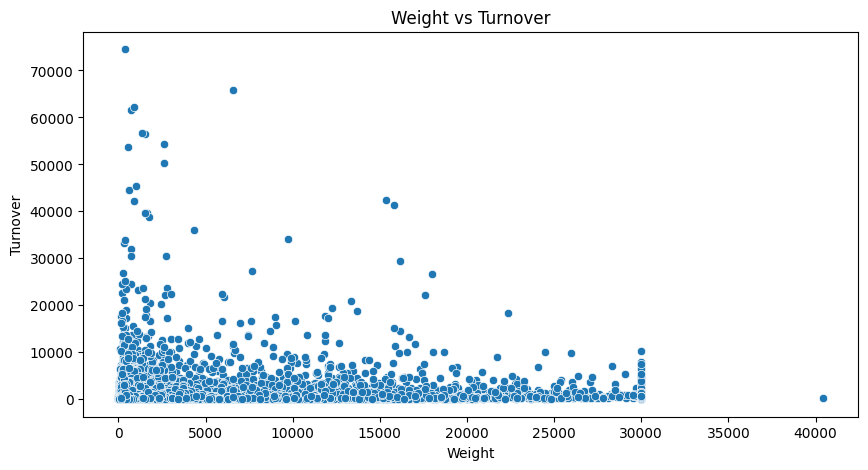

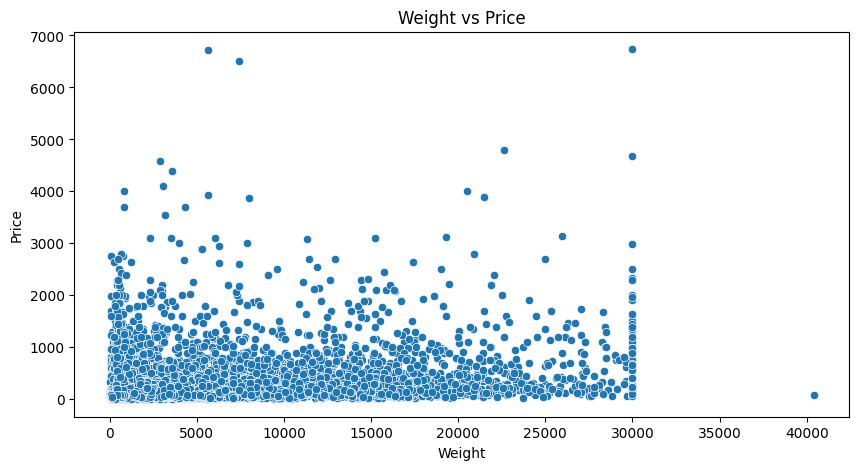

In [18]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=task_4['product_weight_g'], y=task_4['turnover'])
plt.title('Weight vs Turnover')
plt.xlabel('Weight')
plt.ylabel('Turnover')
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(x=task_4['product_weight_g'], y=task_4['price'])
plt.title('Weight vs Price')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.show()

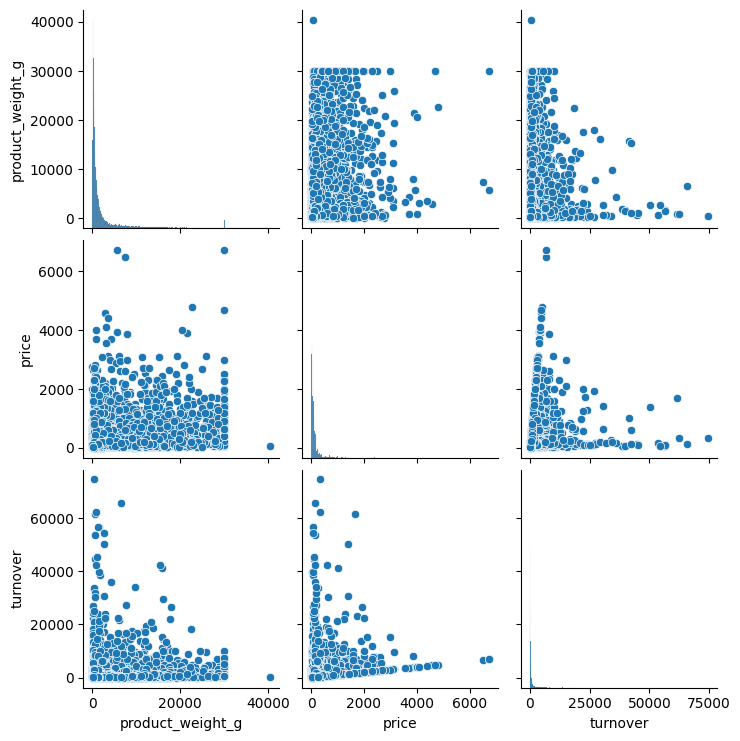

In [19]:
sns.pairplot(task_4[['product_weight_g', 'price', 'turnover']])

plt.show()

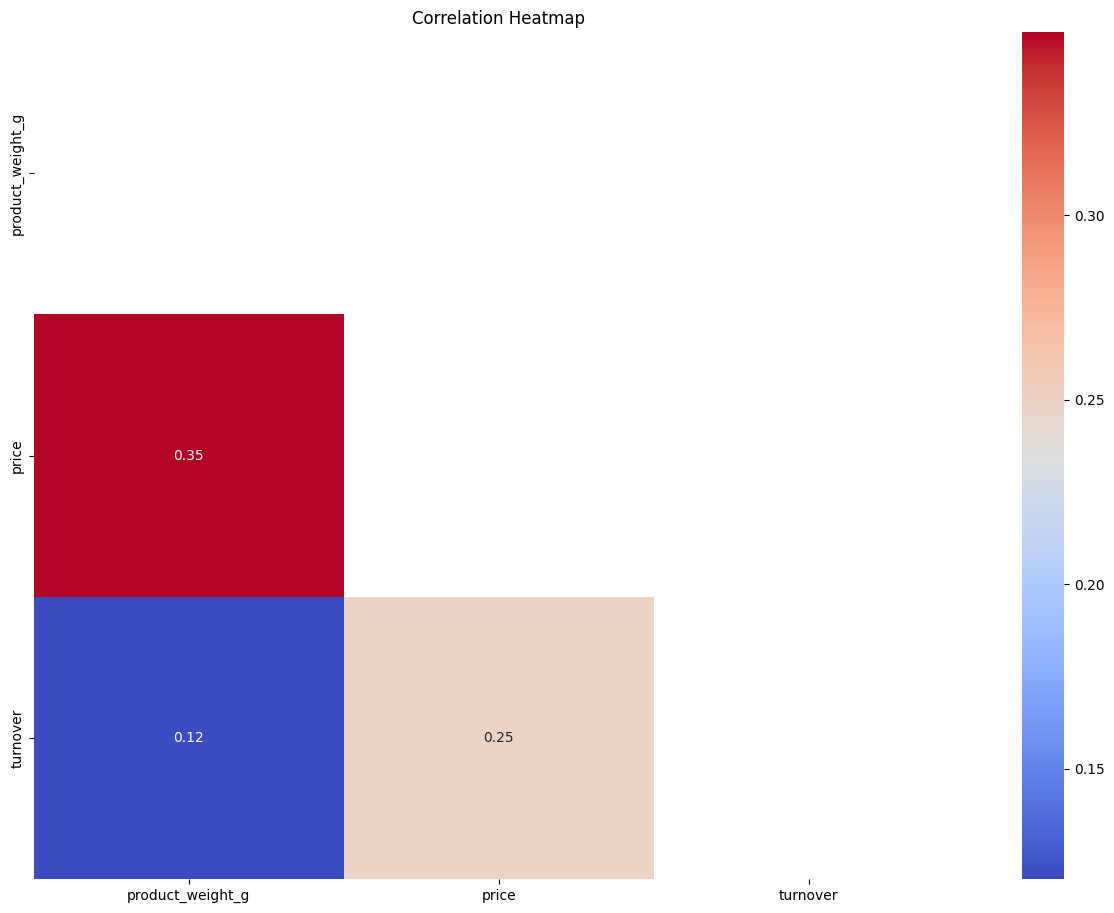

In [20]:
correlation_matrix = task_4[['product_weight_g', 'price', 'turnover']].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize = (15,11))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap between product weight, price and turnover')
plt.show()

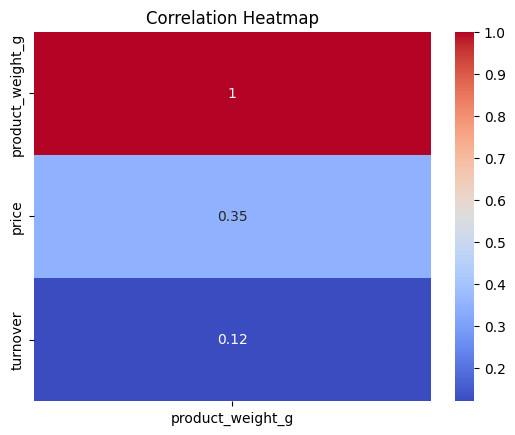

In [24]:
correlation_matrix = task_4[['product_weight_g', 'price', 'turnover']].corr()
sns.heatmap(correlation_matrix[['product_weight_g']].sort_values(by='product_weight_g', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation between product weight and price product weight and turnover')
plt.show()

# Task 3